# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The ground staff were not h...
1,✅ Trip Verified | Second time BA Premium Econ...
2,Not Verified | They changed our Flights from ...
3,Not Verified | At Copenhagen the most chaotic...
4,✅ Trip Verified | Worst experience of my life...


In [6]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df.head()

,reviews
0,✅ Trip Verified | The ground staff were not h...
1,✅ Trip Verified | Second time BA Premium Econ...
2,Not Verified | They changed our Flights from ...
3,Not Verified | At Copenhagen the most chaotic...
4,✅ Trip Verified | Worst experience of my life...


In [8]:
df["reviews_clean"] = df["reviews"].str.replace("✅ Trip Verified", "").str.replace("|", "")
df.head()

C:\Users\KeisezrG\AppData\Local\Temp\ipykernel_18888\3961070354.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["reviews_clean"] = df["reviews"].str.replace("✅ Trip Verified", "").str.replace("|", "")


,reviews,reviews_clean
0,✅ Trip Verified | The ground staff were not h...,The ground staff were not helpful. Felt lik...
1,✅ Trip Verified | Second time BA Premium Econ...,Second time BA Premium Economy in a newer a...
2,Not Verified | They changed our Flights from ...,Not Verified They changed our Flights from B...
3,Not Verified | At Copenhagen the most chaotic...,Not Verified At Copenhagen the most chaotic ...
4,✅ Trip Verified | Worst experience of my life...,Worst experience of my life trying to deal ...


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KeisezrG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [13]:
df_clean = pd.read_excel("data/clean-data.xlsx")
df_clean.head()

,text
0,trip verified ground staff helpful felt wanted...
1,trip verified time premium economy newer aircr...
2,verified changed flights brussels london heath...
3,verified copenhagen chaotic ticket counter ass...
4,trip verified worst experience life deal custo...


In [15]:
tweets = df_clean

In [19]:
#join list string
join_text = " ".join(tweets['text'])
#join_text
join_tweet = join_text.replace('...','')
remove = join_tweet.replace('..','')
clean_text = remove.replace('.\n.','')
print(clean_text)

trip verified ground staff helpful felt wanted rush check passengers needed waiting holding area bus travelling child disability nightmare british airways logged complaint weeks answer lost luggage experience trip verified time premium economy newer aircraft excellent experience despite hour delay missing connection hong kong pleasant flight seats spacious comfortable premium economy layout attitude cabin crew excellent food communicate rebooked connection flight brought peace mind pleasant experience premium economy major disappointment club world earlier year verified changed flights brussels london heathrow lax paid extra choose seats cancelled honored seat bought seated totally different seats asked check employee rude told understand different flight london lax worse airport employees told return day flight rent terminal sleep finally employee voucher nightmare airline missed day work return money paid previous chosen seats verified copenhagen chaotic ticket counter assignment his

In [20]:
#TF
split_text = clean_text.split()
kamus_kata = {}
for data in split_text:
    kamus_kata[data] = clean_text.count(data)
print(kamus_kata)

{'trip': 948, 'verified': 1004, 'ground': 81, 'staff': 419, 'helpful': 86, 'felt': 62, 'wanted': 40, 'rush': 27, 'check': 449, 'passengers': 215, 'needed': 51, 'waiting': 63, 'holding': 9, 'area': 45, 'bus': 477, 'travelling': 47, 'child': 27, 'disability': 2, 'nightmare': 15, 'british': 383, 'airways': 378, 'logged': 5, 'complaint': 56, 'weeks': 46, 'answer': 45, 'lost': 67, 'luggage': 167, 'experience': 280, 'time': 617, 'premium': 160, 'economy': 267, 'newer': 6, 'aircraft': 190, 'excellent': 101, 'despite': 79, 'hour': 520, 'delay': 279, 'missing': 30, 'connection': 36, 'hong': 15, 'kong': 15, 'pleasant': 70, 'flight': 2091, 'seats': 420, 'spacious': 18, 'comfortable': 188, 'layout': 19, 'attitude': 33, 'cabin': 425, 'crew': 501, 'food': 497, 'communicate': 6, 'rebooked': 34, 'brought': 20, 'peace': 2, 'mind': 25, 'major': 21, 'disappointment': 14, 'club': 224, 'world': 130, 'earlier': 27, 'year': 144, 'changed': 54, 'flights': 249, 'brussels': 7, 'london': 640, 'heathrow': 328, 'l

In [21]:
#TF
data_dict = {}
data_list = []
for kalimat in tweets['text']:
    for kata in split_text:
        data_dict[kata] = kalimat.count(kata)
    data_list.append(data_dict)
    data_dict = {}
print(data_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
#IDF 
import math
data_idf = {}
for kata in kamus_kata:
    hitung = math.log(len(tweets['text'])/kamus_kata[kata],10)
    data_idf[kata] = round(hitung,3)
print(data_idf)

{'trip': 0.023, 'verified': -0.002, 'ground': 1.092, 'staff': 0.378, 'helpful': 1.066, 'felt': 1.208, 'wanted': 1.398, 'rush': 1.569, 'check': 0.348, 'passengers': 0.668, 'needed': 1.292, 'waiting': 1.201, 'holding': 2.046, 'area': 1.347, 'bus': 0.321, 'travelling': 1.328, 'child': 1.569, 'disability': 2.699, 'nightmare': 1.824, 'british': 0.417, 'airways': 0.423, 'logged': 2.301, 'complaint': 1.252, 'weeks': 1.337, 'answer': 1.347, 'lost': 1.174, 'luggage': 0.777, 'experience': 0.553, 'time': 0.21, 'premium': 0.796, 'economy': 0.573, 'newer': 2.222, 'aircraft': 0.721, 'excellent': 0.996, 'despite': 1.102, 'hour': 0.284, 'delay': 0.554, 'missing': 1.523, 'connection': 1.444, 'hong': 1.824, 'kong': 1.824, 'pleasant': 1.155, 'flight': -0.32, 'seats': 0.377, 'spacious': 1.745, 'comfortable': 0.726, 'layout': 1.721, 'attitude': 1.481, 'cabin': 0.372, 'crew': 0.3, 'food': 0.304, 'communicate': 2.222, 'rebooked': 1.469, 'brought': 1.699, 'peace': 2.699, 'mind': 1.602, 'major': 1.678, 'disapp

In [27]:
#TFIDF
hasil = []
data_sementara = {}
for index in range(len(data_list)):
    for i in data_list[index]:
        hitung = data_list[index][i] * data_idf[i]
        data_sementara[i] = round(hitung,3)
    hasil.append(data_sementara)
    data_sementara = {}
print(hasil)
all_polarity = 0;
status=[]
total_positif = total_negatif = total = 0
for tweet in tweets['text']:
    analysis = TextBlob(tweet)
    all_polarity += analysis.polarity
    if (analysis.sentiment.polarity > 0.0):
        total_positif += 1
        status.append("Positif")
    elif (analysis.sentiment.polarity <= 0.0):
        total_negatif += 1
        status.append("Negatif")
    total +=1
    
print(f"Hasil Analisis Data: \nPositif = {total_positif}\nNegatif = {total_negatif}")
print(f"Total Data : {total}")
        
status = pd.DataFrame({'sentimen': status})
tweets['sentimen'] = status


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Hasil Analisis Data: 
Positif = 591
Negatif = 409
Total Data : 1000


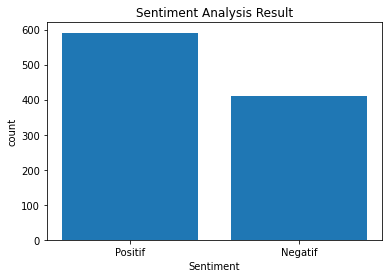

In [34]:
import matplotlib.pyplot as plt
sentiment_counts = tweets.sentimen.value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values);
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()